# Task 4: Predicting Insurance Claim Amounts
# Goal: Estimate medical insurance claim cost (regression problem)
# Dataset: Medical Cost Personal Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2️⃣ Load the Dataset

In [3]:
data = pd.read_csv(r"G:\Documents\Internships Data\Developerhub\Task=4=Insurance-Regression\insurance.csv")  # replace with your path if needed
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3️⃣ Dataset Inspection

In [4]:
print(data.shape)
print(data.info())
print(data.isnull().sum()) 

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# 4️⃣ Exploratory Data Analysis (EDA)

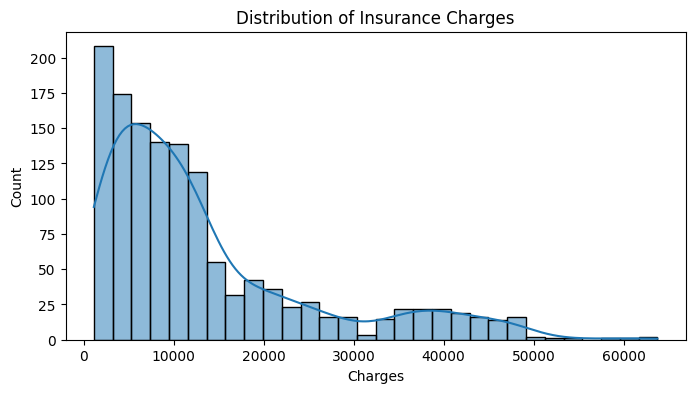

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(data['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


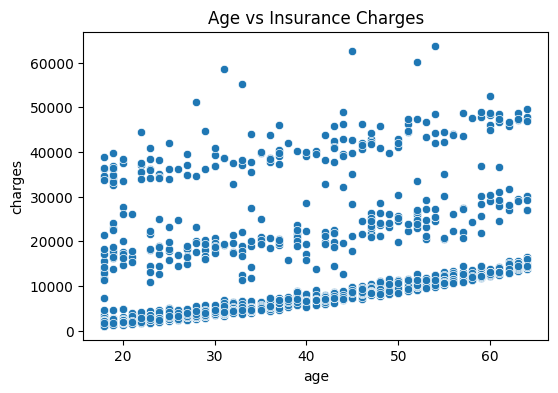

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Age vs Insurance Charges')
plt.show()

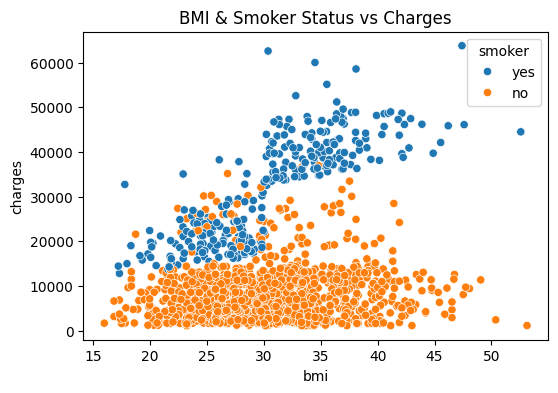

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title('BMI & Smoker Status vs Charges')
plt.show()

# 5️⃣ Data Preparation

In [8]:
X = data.drop('charges', axis=1)
y = data['charges']

# Identify categorical and numerical columns
cat_cols = ['sex', 'smoker', 'region']
num_cols = ['age', 'bmi', 'children']

# Build preprocessor for one‑hot encoding of categorical data
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols)
], remainder='passthrough')

# 6️⃣ Train‑Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7️⃣ Build & Train Model

In [10]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 8️⃣ Model Evaluation

In [11]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R‑squared (R2 Score): {r2:.2f}')

Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28
R‑squared (R2 Score): 0.78


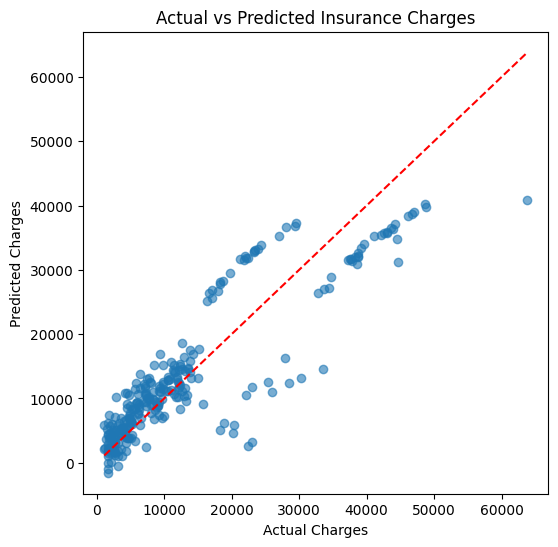

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# 9️⃣ Interpretation & Insight
# Example insight interpretation:
- Smoker status has a huge positive impact on charges.
- Higher BMI and older age often correlate with higher insurance cost.
- Region and sex also show slight variation patterns in charges.